## Machine learning -> Supervised Learning

#### Given is the ‘Portugal Bank Marketing’ dataset

The analysis of the Portugal Bank Marketing dataset showed that the target variable is highly imbalanced, with most clients not subscribing. EDA revealed that duration strongly correlates with the target but causes data leakage, while features like job, marital, education, housing, loan, and especially poutcome provide useful patterns. Missing values (as “unknown”) were treated as separate categories, categorical features were encoded, and Random Forest identified key predictors such as euribor3m, nr.employed, and emp.var.rate. SMOTE was applied to handle imbalance, and numerical data was standardized. Three models Logistic Regression, Decision Tree, and Random Forest were built and evaluated. After tuning, Random Forest performed the best with the highest recall, F1-score, and ROC-AUC, making it the most effective model for predicting client subscription to term deposits.

#### Import all the requried libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

#### Loading the dataset

In [26]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
df = pd.read_csv("bank.csv")

print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

#### details about the dataset

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [14]:
print(df.describe(include='all'))

                age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41188     41

In [17]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Check values and their count in the columns

In [27]:
for col in df.columns:
    print("---------------{}------------------".format(col))
    print(df[col].value_counts())
    print()


---------------age------------------
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64

---------------job------------------
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

---------------marital------------------
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

---------------education------------------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: in

The dataset contains 41,188 records and 21 columns. No null values are present based on the given info() output. Key features such as age, campaign, and duration have wide ranges, needing analysis for scaling and outliers.

#### Question1. Exploratory Data Analysis (EDA) should be done

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

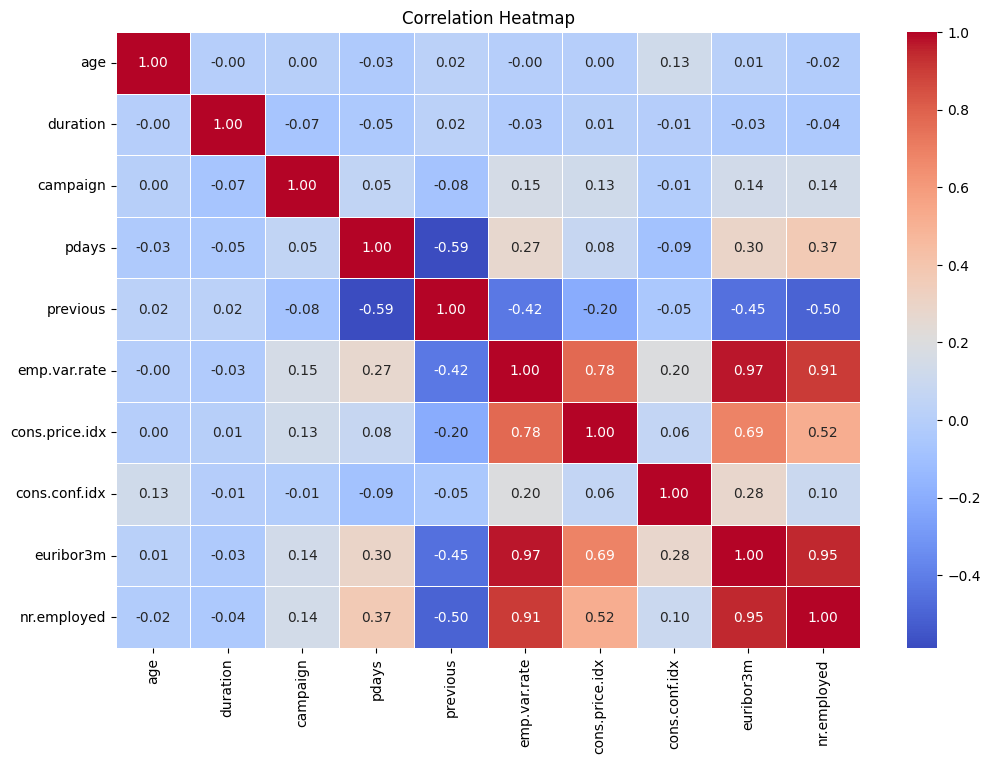

In [ ]:
#i have selected numerical columns for correlation matrix
numerical_data = df.select_dtypes(include=['int64', 'float64'])
# i have calculated the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()
# then to display the correlation matrix
print(correlation_matrix)
# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

                     age       job   marital  education   default   housing  \
age             1.000000  0.001250 -0.389753  -0.117892  0.164965 -0.001603   
job             0.001250  1.000000  0.027897   0.134121 -0.028277  0.006962   
marital        -0.389753  0.027897  1.000000   0.109220 -0.079450  0.010467   
education      -0.117892  0.134121  0.109220   1.000000 -0.186859  0.016825   
default         0.164965 -0.028277 -0.079450  -0.186859  1.000000 -0.015815   
housing        -0.001603  0.006962  0.010467   0.016825 -0.015815  1.000000   
loan           -0.007368 -0.010209  0.005788   0.006384 -0.003782  0.044296   
contact         0.007021 -0.025132 -0.054501  -0.105726  0.135238 -0.082186   
month          -0.024877 -0.033213 -0.007629  -0.082684 -0.015830 -0.018141   
day_of_week    -0.017572 -0.000844  0.002202  -0.017986 -0.008701  0.003339   
duration       -0.000866 -0.006490  0.010290  -0.015102 -0.011794 -0.007658   
campaign        0.004594 -0.006923 -0.007240   0.000

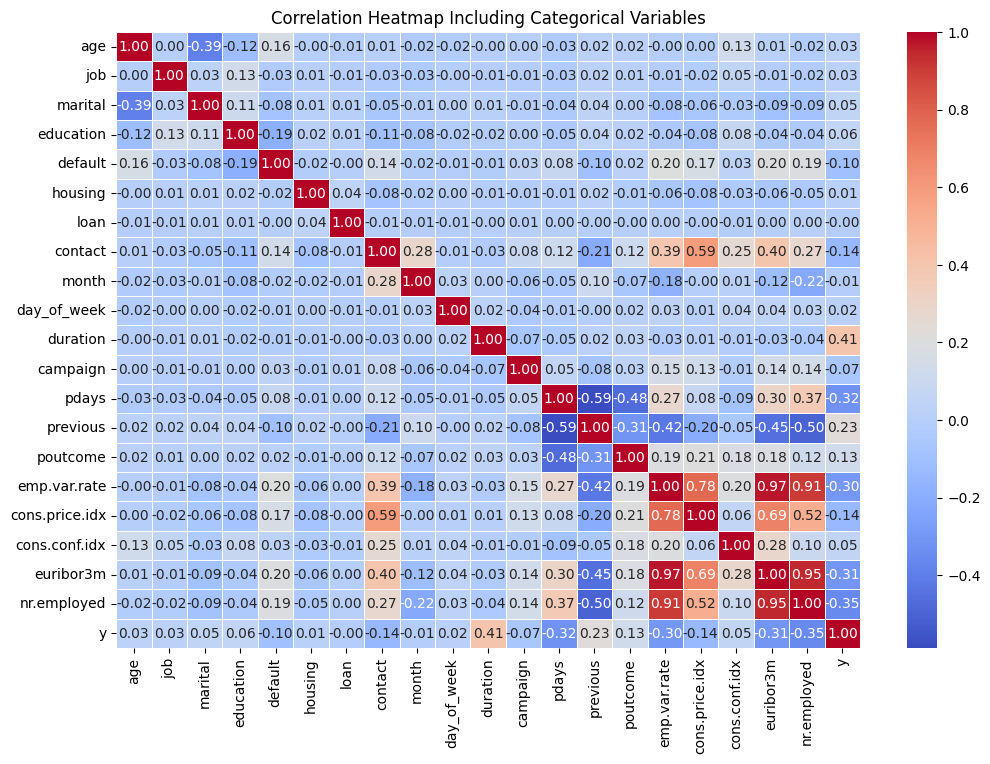

In [29]:
from sklearn.preprocessing import LabelEncoder

# i have encoded categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# i have calculated correlation on the entire dataset
correlation_matrix = df.corr()

# then to display the correlation matrix
print(correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap Including Categorical Variables")
plt.show()

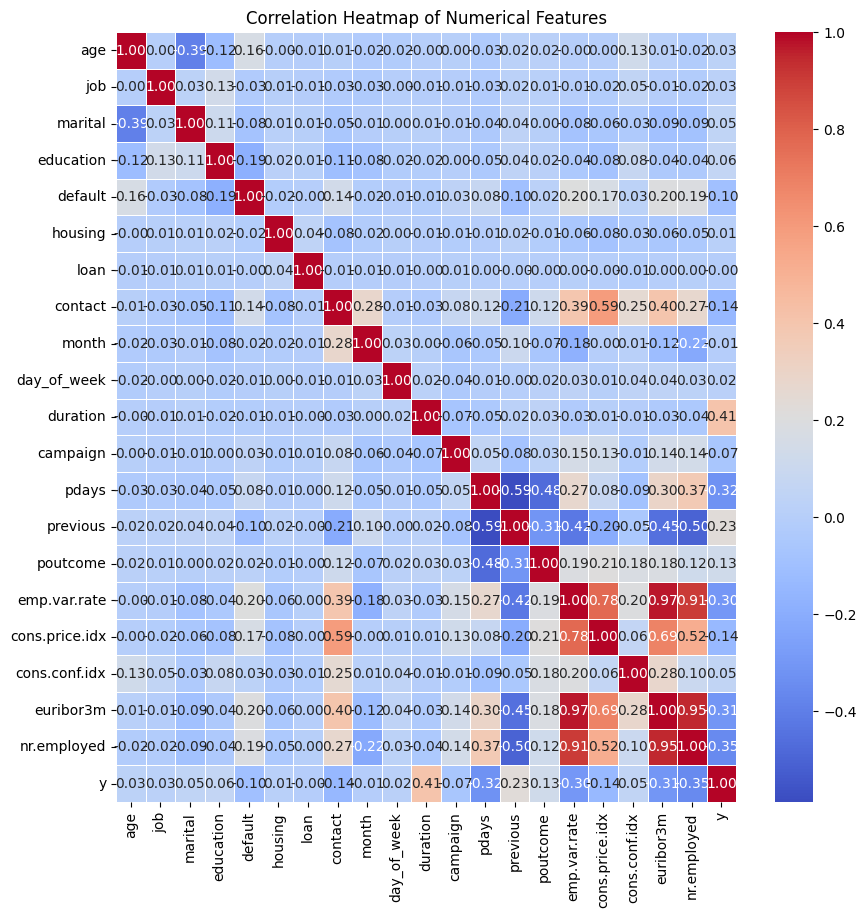

In [30]:
# i have selected only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# i have computed correlation matrix for numerical columns only
corr_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show() 

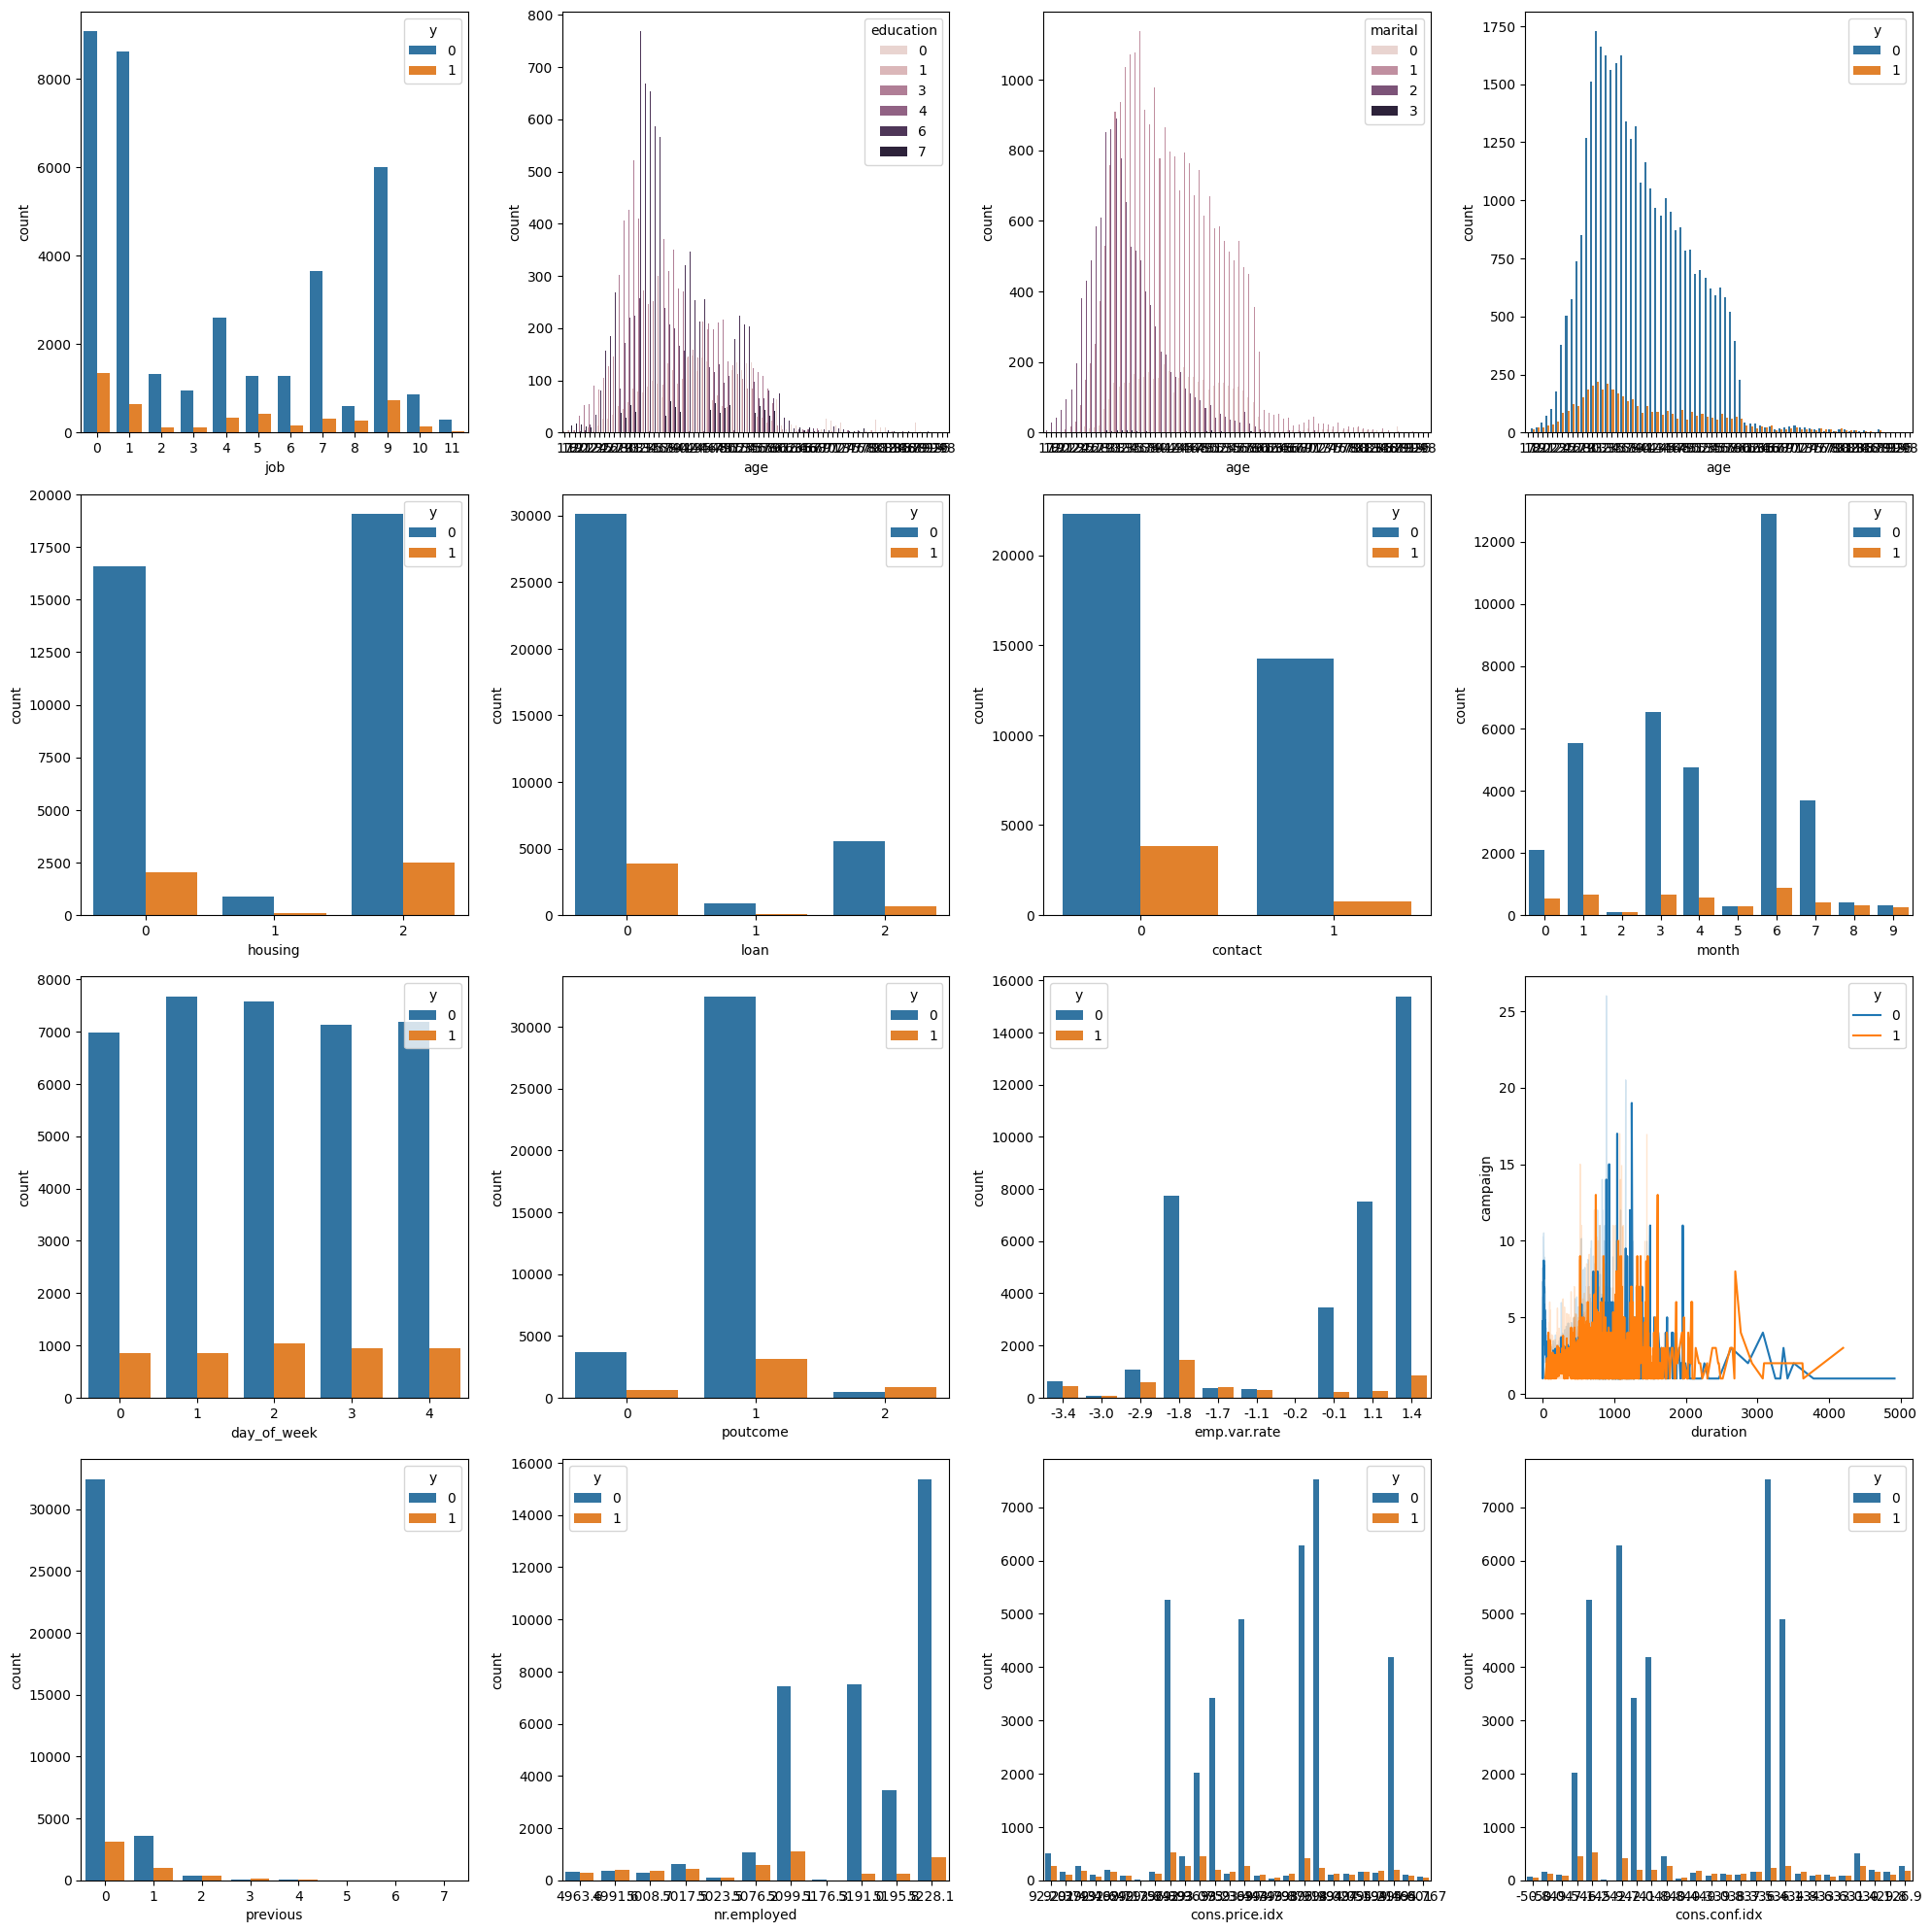

In [31]:
# Creating a 4x4 grid for subplots
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Plotting countplots and lineplot for relevant features in your dataset
sns.countplot(x='job', data=df, hue='y', ax=ax[0, 0])  # it is job vs target variable
sns.countplot(x='age', data=df, hue='education', ax=ax[0, 1])  # it is education vs age
sns.countplot(x='age', data=df, hue='marital', ax=ax[0, 2])  # it is marital vs age
sns.countplot(x='age', data=df, hue='y', ax=ax[0, 3])  # it is age vs target variable

sns.countplot(x='housing', data=df, hue='y', ax=ax[1, 0])  # it is housing vs target variable
sns.countplot(x='loan', data=df, hue='y', ax=ax[1, 1])  # it is loan vs target variable
sns.countplot(x='contact', data=df, hue='y', ax=ax[1, 2])  # it is contact vs target variable
sns.countplot(x='month', data=df, hue='y', ax=ax[1, 3])  # it is month vs target variable

sns.countplot(x='day_of_week', data=df, hue='y', ax=ax[2, 0])  # it is day_of_week vs target variable
sns.countplot(x='poutcome', data=df, hue='y', ax=ax[2, 1])  # it is poutcome vs target variable
sns.countplot(x='emp.var.rate', data=df, hue='y', ax=ax[2, 2])  # it is emp.var.rate vs target variable
sns.lineplot(x='duration', y='campaign', data=df, hue='y', ax=ax[2, 3])  # it is duration vs campaign

sns.countplot(x='previous', data=df, hue='y', ax=ax[3, 0])  # it is previous vs target variable
sns.countplot(x='nr.employed', data=df, hue='y', ax=ax[3, 1])  # it is nr.employed vs target variable
sns.countplot(x='cons.price.idx', data=df, hue='y', ax=ax[3, 2])  # it is cons.price.idx vs target variable
sns.countplot(x='cons.conf.idx', data=df, hue='y', ax=ax[3, 3])  # it is cons.conf.idx vs target variable

# Show the plot
plt.tight_layout()
plt.show()

##### The analysis reveals that clients with stable or managerial jobs are more likely to subscribe to term deposits compared to those in less stable occupations. Age also appears to play a role, as younger clients in the 20–30 age group show lower subscription rates than older clients, suggesting that maturity and financial stability may influence investment decisions. Additionally, clients with housing loans tend to subscribe less frequently, indicating that existing financial commitments may reduce the likelihood of investing in term deposits.

#### Question2.Data Pre-processing

part a -> to check for Missing Value Analysis

In [32]:
missing_values = df.isnull().sum()
print("Missing Values in each column:\n", missing_values)

Missing Values in each column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [33]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage:\n", missing_percentage)

Missing values percentage:
 age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


part b -> to do Label Encoding Wherever it is Required

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initializing label encoder
label_encoder = LabelEncoder()

# Applying Label Encoding to categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head()) 

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.85

All categorical features, including job, education, and y, have been converted to numerical values, making them suitable for use in machine learning algorithms that require numerical input.

part c-> Selecting Important Features Based on Random Forest

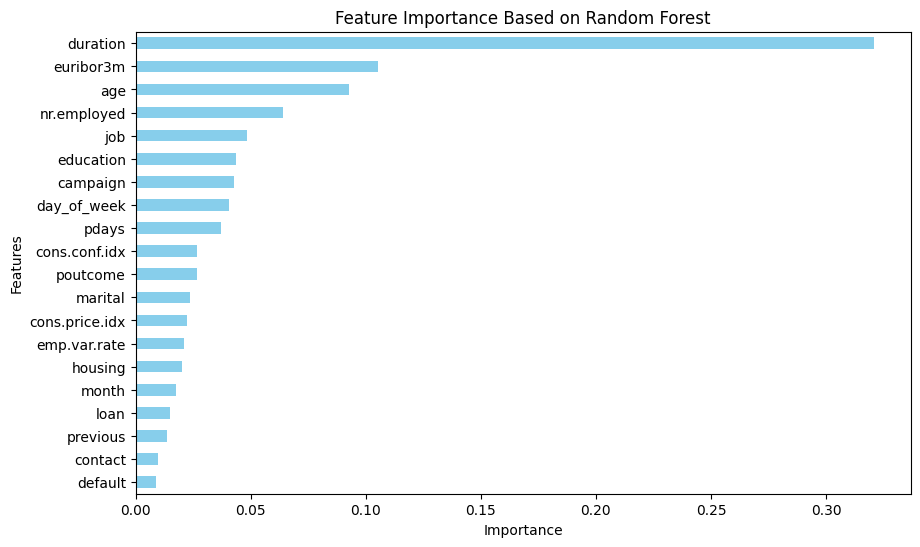

duration          0.320716
euribor3m         0.105479
age               0.092568
nr.employed       0.064100
job               0.048465
education         0.043489
campaign          0.042731
day_of_week       0.040615
pdays             0.036893
cons.conf.idx     0.026680
poutcome          0.026530
marital           0.023741
cons.price.idx    0.022129
emp.var.rate      0.021073
housing           0.020338
month             0.017393
loan              0.014946
previous          0.013582
contact           0.009747
default           0.008785
dtype: float64


In [48]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Define the feature set and target variable
x = df.drop(columns=['y'])  # Features
y = df['y']  # Target variable

# Train a Random Forest model to evaluate feature importance
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x, y)

# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance Based on Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # highest importance on top
plt.show()

print(feature_importance)


part d -> to Handle Unbalanced Data Using SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before applying SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Check class distribution after applying SMOTE
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 36548, 1: 4640})
After SMOTE: Counter({0: 36548, 1: 36548})


As the dataset is unbalanced, SMOTE creates synthetic samples for the minority class. After applying SMOTE, the number of samples for each class is balanced, helping to avoid bias in the model's predictions.

part e -> Standardization the Data Using a Scaler

In [50]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
x_scaled = scaler.fit_transform(x_resampled)

# Check the scaled features
print("Scaled features (first 5 rows):\n", x_scaled[:5])

Scaled features (first 5 rows):
 [[ 1.37875321 -0.18686533 -0.17394457 -1.85914989 -0.37928714 -1.04043488
  -0.41912453  1.80593798  0.78044176 -0.6595586  -0.35095501 -0.51956461
   0.35692714 -0.42077124  0.11199529  0.92837066  0.82971179  0.71913466
   1.00244283  0.63921678]
 [ 1.46540108  0.99438634 -0.17394457 -0.36678847  2.6345592  -1.04043488
  -0.41912453  1.80593798  0.78044176 -0.6595586  -0.66371327 -0.51956461
   0.35692714 -0.42077124  0.11199529  0.92837066  0.82971179  0.71913466
   1.00244283  0.63921678]
 [-0.26755622  0.99438634 -0.17394457 -0.36678847 -0.37928714  1.1018645
  -0.41912453  1.80593798  0.78044176 -0.6595586  -0.44869197 -0.51956461
   0.35692714 -0.42077124  0.11199529  0.92837066  0.82971179  0.71913466
   1.00244283  0.63921678]
 [-0.00761263 -1.07280408 -0.17394457 -1.36169608 -0.37928714 -1.04043488
  -0.41912453  1.80593798  0.78044176 -0.6595586  -0.65812831 -0.51956461
   0.35692714 -0.42077124  0.11199529  0.92837066  0.82971179  0.71913466

## Question 3. To Build the following Supervised Learning models

In [51]:
from sklearn.model_selection import train_test_split


x = df.drop(columns=['y'])
y = df['y']

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

part a -> Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(x_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(x_test)

# Model evaluation
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Classification Report:\n", log_reg_report)
print("Confusion Matrix:\n", log_reg_conf_matrix)

Logistic Regression Accuracy: 0.8859097127222982
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      7310
           1       0.88      0.89      0.89      7310

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620

Confusion Matrix:
 [[6415  895]
 [ 773 6537]]


part b -> Decision Tree Model

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree_model.predict(x_test)

# Model evaluation
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_report = classification_report(y_test, y_pred_tree)
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)

print("Decision Tree Accuracy:", tree_accuracy)
print("Classification Report:\n", tree_report)
print("Confusion Matrix:\n", tree_conf_matrix)

Decision Tree Accuracy: 0.9265389876880985
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7310
           1       0.92      0.94      0.93      7310

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620

Confusion Matrix:
 [[6708  602]
 [ 472 6838]]


part c-> Random forest Model

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train, y_train)

# Predict on the test set
y_pred_forest = random_forest_model.predict(x_test)

# Model evaluation
forest_accuracy = accuracy_score(y_test, y_pred_forest)
forest_report = classification_report(y_test, y_pred_forest)
forest_conf_matrix = confusion_matrix(y_test, y_pred_forest)

print("Random Forest Accuracy:", forest_accuracy)
print("Classification Report:\n", forest_report)
print("Confusion Matrix:\n", forest_conf_matrix)

Random Forest Accuracy: 0.9552667578659371
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      7310
           1       0.94      0.97      0.96      7310

    accuracy                           0.96     14620
   macro avg       0.96      0.96      0.96     14620
weighted avg       0.96      0.96      0.96     14620

Confusion Matrix:
 [[6868  442]
 [ 212 7098]]


## Question 4. Model tuning

### part a: Hyperparameter Tuning (Grid Search)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Hyperparameter Tuning
log_reg = LogisticRegression()

log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

log_reg_grid = GridSearchCV(estimator=log_reg, param_grid=log_reg_params, cv=5, verbose=1)
log_reg_grid.fit(x_train, y_train)

print(f"Best Logistic Regression Parameters: {log_reg_grid.best_params_}")
best_log_reg = log_reg_grid.best_estimator_


# Decision Tree Hyperparameter Tuning
dt = DecisionTreeClassifier()

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, verbose=1)
dt_grid.fit(x_train, y_train)

print(f"Best Decision Tree Parameters: {dt_grid.best_params_}")
best_dt = dt_grid.best_estimator_


# Random Forest Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],        # number of trees
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],        # depth of trees
    'min_samples_split': [2, 5, 10],        # minimum samples required to split
    'min_samples_leaf': [1, 2, 4]           # minimum samples per leaf
}

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, verbose=1, n_jobs=-1)
rf_grid.fit(x_train, y_train)

print(f"Best Random Forest Parameters: {rf_grid.best_params_}")
best_rf = rf_grid.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### part b: Model Evaluation

In [47]:
# Logistic Regression Evaluation
log_reg_pred = best_log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print(f"Logistic Regression Accuracy (after tuning): {log_reg_acc}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, log_reg_pred))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, log_reg_pred))

# Decision Tree Evaluation
dt_pred = best_dt.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy (after tuning): {dt_acc}")
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, dt_pred))      

# Random Forest Evaluation
rf_pred = best_rf.predict(x_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy (after tuning): {rf_acc}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_pred))

Logistic Regression Accuracy (after tuning): 0.8858413132694939
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7310
           1       0.88      0.89      0.89      7310

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620

Confusion Matrix for Logistic Regression:
[[6414  896]
 [ 773 6537]]
Decision Tree Accuracy (after tuning): 0.9331053351573187
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7310
           1       0.93      0.94      0.93      7310

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620

Confusion Matrix for Decision Tree:
[[6757  553]
 [ 425 6885]]
Rand

## Completed with all the questions for supervised learning